# Exploratory Data Analysis of Sales of Video Games.

In this project, we are going to analyse the Sales of Video Games using Python.I have got the dataset from Kaggle.
The Python Libarbries we have used in this dataset is Pandas,Seaborn and Matplotlib.
Pandas is used for Analysis,Data Cleaning etc.
Both Seabron and Matplotlib are used for data visualization.
I highly recommend this course [Data Analysis with Python: Zero to Pandas] if you want to pursue your career in Data Analysis.

## Downloading the Dataset

We will download our dataset form Kaggle website

In [220]:
pip install jovian opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ebrahimangolkar
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 8.84MB/s]

The dataset has been downloaded and extracted.

In [ ]:
data_dir = './videogamesales'

In [ ]:
import os
os.listdir(data_dir)

Let us save and upload our work to Jovian before continuing.

In [223]:
project_name = "video-games-sales-analysis" # change this (use lowercase letters and hyphens only)

In [224]:
pip install jovian --upgrade -q

Note: you may need to restart the kernel to use updated packages.


In [8]:
import jovian

In [219]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "eangolkar/video_games_sales_analysis-course-project-starter"
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/eangolkar/video-games-sales-analysis-course-project-starter


'https://jovian.ai/eangolkar/video-games-sales-analysis-course-project-starter'

## Data Preparation and Cleaning

We have our raw dataset. Now, we'll remove the unwanted data.

In [84]:
#Loading our  dataset 
import pandas as pd
video_df= pd.read_csv('vgsales.csv')

In [225]:
video_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year123
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2008.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1996.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,2002.0
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,2003.0
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,2008.0
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,2010.0


In [12]:
video_df.Year.max()
video_df.Year.min()
print("The data is recorded from Year {}  to {} ".format(video_df.Year.min(),video_df.Year.max()))

The data is recorded from Year 1980.0  to 2020.0 


In [13]:
Number_of_publishers=video_df.Publisher.nunique()
Number_of_Platforms=video_df.Platform.nunique()
Number_of_Genre=video_df.Genre.nunique()


print("There are {} video games Publishers based on the dataset,While the games are played on {} different gaming platforms and {} gaming genre.".format(Number_of_publishers,Number_of_Platforms,Number_of_Genre))

There are 578 video games Publishers based on the dataset,While the games are played on 31 different gaming platforms and 12 gaming genre.


Here's what we can tell by looking from results:

- The games are sorted in rank wise,with Wii Sports Top ranked game while Spirits & Spells are lowest ranked game
- There are 576 video games Publishers based on the dataset,While the games are played on 31 different gaming platforms and 12 gaming genre.
- Data is recorded from the Year 1980 to 2020


We can view some basic stats about the numerical columns using `describe` method.

In [14]:
video_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**Let us check out the shape of our dataset**

In [15]:
video_df.shape
print("There are {} rows and {} columns int the dataset".format(video_df.shape[0],video_df.shape[1]))

There are 16598 rows and 11 columns int the dataset


# Data Cleaning

In [16]:
video_df.drop(video_df[video_df.Year.isnull()].index, inplace = True) #remove null value in Year of release column
video_df.drop(video_df[video_df.Name.isnull()].index, inplace = True) #remove null value in Name column
video_df.drop(video_df[video_df.Publisher.isnull()].index, inplace = True) #remove null value in Publisher column
video_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Here's a summary of the functions & methods we've looked at so far:

* `pd.read_csv` - Read data from a CSV file into a Pandas `DataFrame` object
* `.info()` - View basic infomation about rows, columns & data types
* `.describe()` - View statistical information about numeric columns
* `.max() & min()` - Max() function gets maximum value from a column and  of rows & while min() function gets minimum value from a column
* `.unique() & nunique()` - unique() functions gives a list of unique values from a column while nunique returns number of unique values.
*`.drop()`-Remove rows or columns by specifying label names
*`Cleaned the dataset`

In [18]:
import jovian

In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "eangolkar/videogamessalesanalysis-course-project-starter" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/eangolkar/videogamessalesanalysis-course-project-starter


'https://jovian.ai/eangolkar/videogamessalesanalysis-course-project-starter'

## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [226]:
#Checking out the first 5 rows of the dataset
video_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year123
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2008.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1996.0


# Sales by each region

 **Lets start by finding total sales by each region**

In [23]:
Total_sales_by_region=video_df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
Total_sales_by_region

NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64

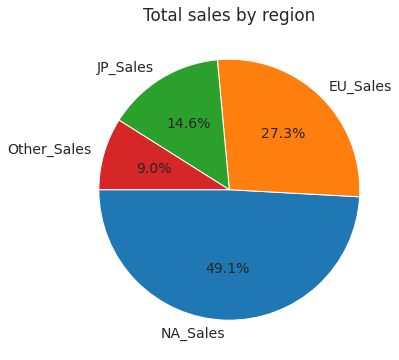

In [24]:
plt.figure(figsize=(12,6))
plt.title('Total sales by region')
plt.pie(Total_sales_by_region, labels=Total_sales_by_region.index, autopct='%1.1f%%', startangle=180);

As we can see NA region has most video games sales by hopping 49.1%,almost half of video games sales has been made in NA region.No suprises there as gaming is very popular in North American countries like USA and Canada.

# Sales by Genre

 **Lets find out the total sales by each genre,also we can find which genre has highest sales and which genre has lowest sales**

In [25]:
sales_by_genre=video_df.groupby('Genre')[['Global_Sales']].sum()
sorted=sales_by_genre.sort_values('Global_Sales',ascending=False)
sorted

,Global_Sales
Genre,
Action,1722.84
Sports,1309.24
Shooter,1026.20
Role-Playing,923.83
Platform,829.13
Misc,789.87
Racing,726.76
Fighting,444.05
Simulation,389.98


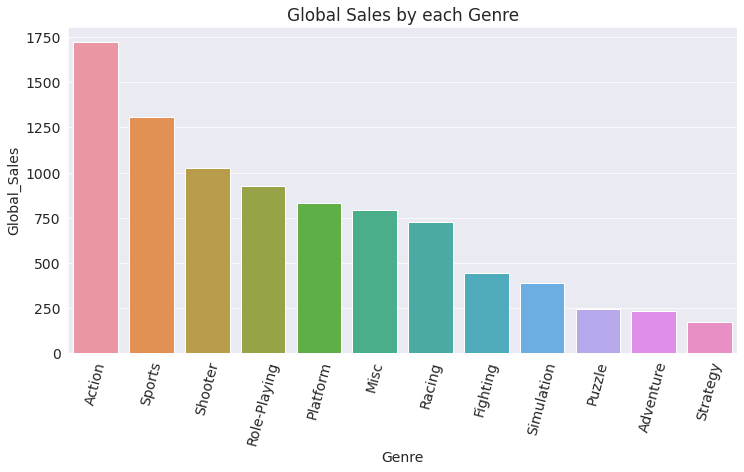

In [26]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Global Sales by each Genre")
sns.barplot(x=sorted.index, y=sorted.Global_Sales);

As we can see Action genre has highest sales while strategy has lowest sales.Gamers do love action.


# Platforms

 **Let us find the different gaming platforms**


In [27]:
video_df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**Now lets find out Top 10  platform preferred by gamers**

In [238]:
most_popular_platform=video_df.value_counts('Platform').head(10)
most_popular_platform

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
dtype: int64

Text(0.5, 1.0, 'Top 10 platforms preferred by gamers')

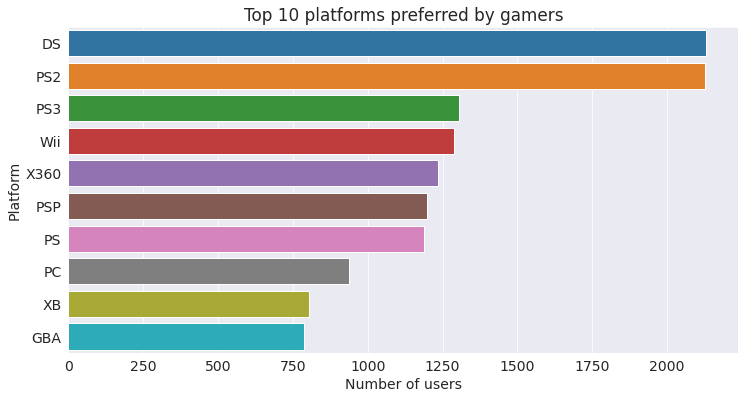

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_popular_platform, y=most_popular_platform.index)
plt.xlabel('Number of users')
plt.title("Top 10 platforms preferred by gamers")

DS is most preferred platform by gamers,followed by PS2 and PS3.

# Publisher

**We know there are 578 publishers,But which publisher has published most games?lets find Top 20 publishers**

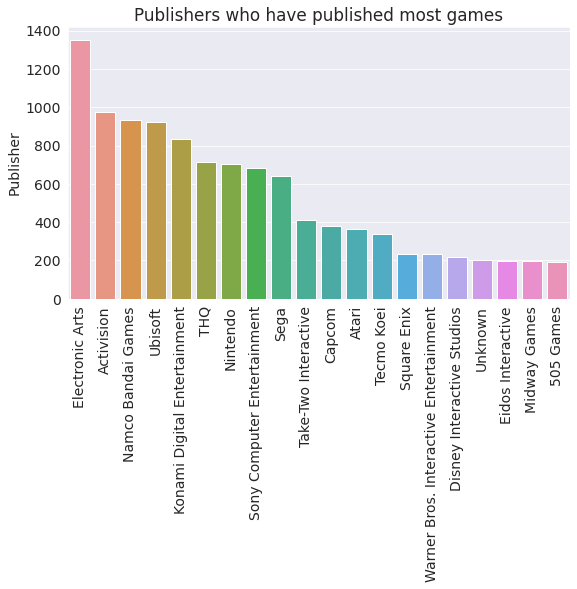

In [102]:
publisher=video_df.Publisher.value_counts().head(20)
plt.title("Publishers who have published most games")
plt.xticks(rotation=90)
sns.barplot(x=publisher.index, y=publisher);

# Here's a summary of the functions & methods we've looked at so far:

* `.head()` - It is used Return the first n rows
* `.sum()` - It is used to return the sum of the values for the requested axis by the user
* `.groupby()` - Groupby() function is used to split the data into groups based on some criteria.
* `.value_counts()` - Return a Series containing counts of unique rows in the DataFrame.
* `.sort_values()` -  Sort a Series in ascending or descending order by some criterion.
* We have found Sales by each region,Sales by Genre,Top 10 platform preferred by gamers and Publishers who have published most games
* We have used different graphs like pie chart,bar graph and hbar graph.

# Asking and Answering Questions




# **Q1)Which year saw highest global sales?**

In [86]:
year=video_df.groupby('Year')['Global_Sales'].sum()
year

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

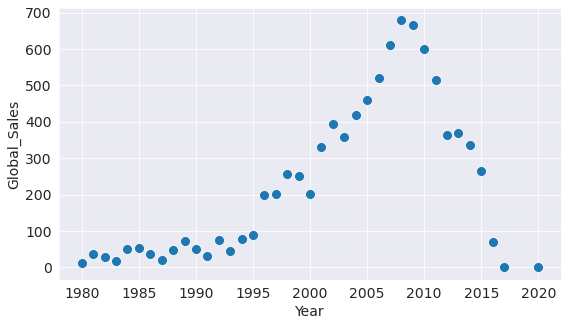

In [103]:
sns.scatterplot(x=year.index, y=year,s=100,data='year');

 **As we can see the year 2008 saw highest global sales,followed by 2009.**

# Q2)As we know from above result Electronic Arts has published most games,but on which genre does Electronic Arts mostly publishes games?

In [104]:
Elec=video_df[(video_df.Publisher=='Electronic Arts')]
EA_preferred_genre=Elec['Genre'].value_counts()
EA_preferred_genre

Sports          561
Action          183
Racing          159
Shooter         139
Simulation      116
Misc             46
Fighting         39
Strategy         37
Role-Playing     35
Platform         16
Adventure        13
Puzzle            7
Name: Genre, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

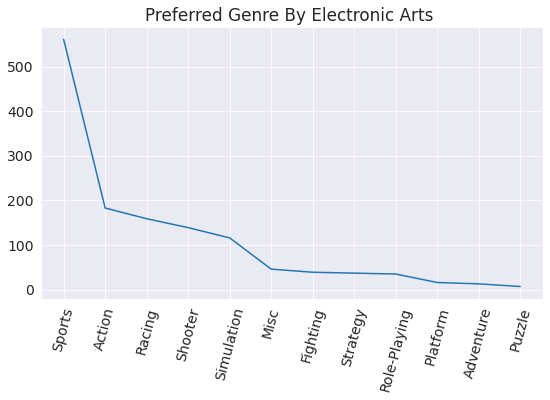

In [231]:
plt.plot(EA_preferred_genre.index,EA_preferred_genre)
plt.title("Preferred Genre By Electronic Arts ")
plt.xticks(rotation=75)

We can see that EA has published 554 games on sports genre,372 more games from second place 'action' genre.Lets find out what percentage of sports genre games is published by EA sports.There is a huge dip from 1st place sports genre to 2nd place action genre

In [35]:
Percentage_of_sports_genre_made_by_EA=EA_preferred_genre.Sports*100/EA_preferred_genre.sum()

print("{:.2f} % of games published by Electronic Arts are based on sports genre.".format(Percentage_of_sports_genre_made_by_EA))

41.37 % of games published by Electronic Arts are based on sports genre.


# **Q3)Electronic Arts publishes 41.37% of games on sports genre,Which are Top 15 ranked games published by Electronic Arts that were not based on sports genre or the game was fifa**

In [240]:
Electronic_Arts_and_sports=video_df[(video_df.Publisher=='Electronic Arts') & ~(video_df.Genre=='Sports') & ~(video_df.Name.str.contains('FIFA'))]
Electronic_Arts_and_sports=Electronic_Arts_and_sports.head(15)
Electronic_Arts_and_sports.loc[:,['Name','Genre']]

,Name,Genre
83,The Sims 3,Simulation
92,Star Wars Battlefront (2015),Shooter
99,Battlefield 3,Shooter
103,Battlefield 3,Shooter
104,Need for Speed Underground,Racing
113,Need for Speed Underground 2,Racing
114,Medal of Honor: Frontline,Shooter
174,Final Fantasy X-2,Role-Playing
190,Medal of Honor: Rising Sun,Shooter
227,The Lord of the Rings: The Two Towers,Action


# **Q4)Which were 10 most sold fifa games in NA region?A region in which football isn't as popular as sports like Baseball or Basketball**

In [107]:
fifa=video_df[video_df.Name.str.contains('FIFA')]
fifa.sort_values(by='NA_Sales',ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
185,186,FIFA Soccer 13,X360,2012.0,Action,Electronic Arts,1.08,3.48,0.03,0.58,5.18
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
256,257,FIFA 14,X360,2013.0,Sports,Electronic Arts,0.92,2.93,0.01,0.46,4.31
416,417,FIFA 16,XOne,2015.0,Sports,Electronic Arts,0.88,2.11,0.00,0.23,3.23
121,122,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
275,276,FIFA 12,X360,2011.0,Sports,Electronic Arts,0.84,2.79,0.02,0.53,4.19
124,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
112,113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
269,270,FIFA Soccer 06,PS2,2005.0,Sports,Electronic Arts,0.78,2.55,0.04,0.84,4.21


 **Fifa 16 for PS4 platform was most sold fifa game in NA region,followed by fifa 13 for Xbox 360.**

# Q5)Lets find some useful information from the data

# Which all games of non-action Genre were sold for total price greater than 5.0 in JP region? 

In [176]:
Price_ge_5_JP=video_df[(video_df.JP_Sales > 5.0) & ~(video_df.Genre == 'Action')]
Price_ge_5_JP=Price_ge_5_JP.loc[:,['Name','Genre','JP_Sales']] 
Price_ge_5_JP

,Name,Genre,JP_Sales
1,Super Mario Bros.,Platform,6.81
4,Pokemon Red/Pokemon Blue,Role-Playing,10.22
6,New Super Mario Bros.,Platform,6.50
12,Pokemon Gold/Pokemon Silver,Role-Playing,7.20
20,Pokemon Diamond/Pokemon Pearl,Role-Playing,6.04
25,Pokemon Ruby/Pokemon Sapphire,Role-Playing,5.38
26,Pokemon Black/Pokemon White,Role-Playing,5.65
27,Brain Age 2: More Training in Minutes a Day,Puzzle,5.32
41,Animal Crossing: Wild World,Simulation,5.33


# Which all games were sold for total price greater than 6.0 for PS4 Platform in EU region? 

In [191]:
Price_ge_6_EU=video_df[(video_df.EU_Sales > 6.0) & (video_df.Platform == 'PS4')]
Price_ge_6_EU=Price_ge_6_EU.iloc[:,[1,2,7]]
Price_ge_6_EU

,Name,Platform,EU_Sales
77,FIFA 16,PS4,6.06


# Which all games were sold for total price greater than 15.0 in NA region in the year 2008? 

In [168]:
Price_ge_15_NA=video_df[(video_df.NA_Sales > 15.0) & (video_df.Year ==2008)]
Price_ge_15_NA=Price_ge_15_NA.loc[:,['Name','NA_Sales']]
Price_ge_15_NA

,Name,NA_Sales
2,Mario Kart Wii,15.85


# Which all games were sold for total price greater than 40.0 in Global region by Nintendo?

In [194]:
Price_ge_40_GS=video_df[(video_df.Global_Sales > 40.0)  & (video_df.Publisher == 'Nintendo')]
Price_ge_40_GS=Price_ge_40_GS.iloc[:,[2,5,10]]
Price_ge_40_GS

,Platform,Publisher,Global_Sales
0,Wii,Nintendo,82.74
1,NES,Nintendo,40.24


Let us save and upload our work to Jovian before continuing

In [241]:
import jovian

In [242]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "eangolkar/video-games-sales-analysis-course-project-starter" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/eangolkar/video-games-sales-analysis-course-project-starter


'https://jovian.ai/eangolkar/video-games-sales-analysis-course-project-starter'

## Inferences and Conclusion

- NA region saw most video games sales.
- Highest number of video games were sold in the year 2008
- Action is most loved genre by gamers,while sports genre is just behind in 2nd place.Gamers like strategy games the least.
- Electronic Arts has published highest number of games.They mostly publish games based on Sports Genre.
- DS is most preferred platform by gamers,followed by PS2 and PS3

In [234]:
import jovian

In [235]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "eangolkar/video-games-sales-analysis-course-project-starter" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/eangolkar/video-games-sales-analysis-course-project-starter


'https://jovian.ai/eangolkar/video-games-sales-analysis-course-project-starter'

## References and Future Work

References:-

- Kaggle:- https://www.kaggle.com/learn/pandas
- 10 minutes to pandas.:- https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
- https://media-exp1.licdn.com/dms/document/C4E1FAQHRx5yfuC2OUw/feedshare-document-pdf-analyzed/0/1620729043790?e=1622116800&v=beta&t=8VHJqU9LQ5pCg3GNu_lrRkDERkpa3x1xs27N5Z1M2X4
- Jovian:-https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas

In [243]:
import jovian

In [244]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "eangolkar/video-games-sales-analysis-course-project-starter" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/eangolkar/video-games-sales-analysis-course-project-starter


'https://jovian.ai/eangolkar/video-games-sales-analysis-course-project-starter'